<a href="https://colab.research.google.com/github/LiTaokui/TensorFlow-Example/blob/main/Tensorflow_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# read csv file
frame_0 = pd.read_csv("/content/ANN Frame data.csv")
frame_0

,N.F.1,N.F.2,N.F.3,N.F.4,N.F.5,d/h,l/L
0,19.157,29.225,47.187,50.454,72.801,0.492126,A
1,19.203,29.488,47.252,50.906,73.793,0.472441,A
2,19.248,29.787,47.342,51.338,74.941,0.452756,A
3,19.283,30.035,47.404,51.750,76.004,0.433071,A
4,19.320,30.358,47.490,52.114,77.416,0.413386,A
...,...,...,...,...,...,...,...
95,18.298,30.771,47.700,52.062,81.508,0.098425,D
96,18.308,30.782,47.716,52.554,81.532,0.078740,D
97,18.321,30.803,47.734,53.056,81.554,0.059055,D
98,20.238,36.147,48.381,55.698,81.683,0.039370,D


In [46]:
# let's try one-hot encode our dataframe so it's all numbers
frame = pd.get_dummies(frame_0)
frame.head()

,N.F.1,N.F.2,N.F.3,N.F.4,N.F.5,d/h,l/L_A,l/L_B,l/L_C,l/L_D
0,19.157,29.225,47.187,50.454,72.801,0.492126,1,0,0,0
1,19.203,29.488,47.252,50.906,73.793,0.472441,1,0,0,0
2,19.248,29.787,47.342,51.338,74.941,0.452756,1,0,0,0
3,19.283,30.035,47.404,51.750,76.004,0.433071,1,0,0,0
4,19.320,30.358,47.490,52.114,77.416,0.413386,1,0,0,0


In [47]:
df = pd.DataFrame(frame)

In [48]:
# create X & y values
X = df.loc[0:99, ["N.F.1","N.F.2","N.F.3","N.F.4","N.F.5"]]
X

,N.F.1,N.F.2,N.F.3,N.F.4,N.F.5
0,19.157,29.225,47.187,50.454,72.801
1,19.203,29.488,47.252,50.906,73.793
2,19.248,29.787,47.342,51.338,74.941
3,19.283,30.035,47.404,51.750,76.004
4,19.320,30.358,47.490,52.114,77.416
...,...,...,...,...,...
95,18.298,30.771,47.700,52.062,81.508
96,18.308,30.782,47.716,52.554,81.532
97,18.321,30.803,47.734,53.056,81.554
98,20.238,36.147,48.381,55.698,81.683


In [49]:
y = df.loc[0:99,["d/h","l/L_A","l/L_B","l/L_C","l/L_D"]]
y

,d/h,l/L_A,l/L_B,l/L_C,l/L_D
0,0.492126,1,0,0,0
1,0.472441,1,0,0,0
2,0.452756,1,0,0,0
3,0.433071,1,0,0,0
4,0.413386,1,0,0,0
...,...,...,...,...,...
95,0.098425,0,0,0,1
96,0.078740,0,0,0,1
97,0.059055,0,0,0,1
98,0.039370,0,0,0,1


In [50]:
# create training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test)

(80, 20)

In [63]:
X_train

,N.F.1,N.F.2,N.F.3,N.F.4,N.F.5
55,19.073,31.655,43.366,47.157,74.976
88,18.215,30.653,47.603,48.266,80.942
26,19.824,31.746,43.809,46.826,77.552
42,20.246,35.413,47.530,52.651,78.001
69,19.310,32.568,47.334,51.862,79.287
...,...,...,...,...,...
60,19.185,32.054,46.885,47.252,77.202
71,19.331,32.662,47.384,52.829,79.578
14,19.505,32.966,48.100,54.505,81.388
92,18.258,30.710,47.646,50.505,81.353


In [64]:
y_train

,d/h,l/L_A,l/L_B,l/L_C,l/L_D
55,0.393701,0,0,1,0
88,0.236220,0,0,0,1
26,0.472441,0,1,0,0
42,0.157480,0,1,0,0
69,0.118110,0,0,1,0
...,...,...,...,...,...
60,0.295276,0,0,1,0
71,0.078740,0,0,1,0
14,0.216535,1,0,0,0
92,0.157480,0,0,0,1


In [79]:
# build a neural network 
tf.random.set_seed(42)

# 1.create a model
frame_model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5)
])

# 2. compile the model
frame_model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [80]:
# 3. fit the model
history = frame_model.fit(X_train, y_train, epochs=500)

Epoch 1/500
3/3 [==============================] - 0s 6ms/step - loss: 23.7352 - mae: 23.7352
Epoch 2/500
3/3 [==============================] - 0s 5ms/step - loss: 13.0667 - mae: 13.0667
Epoch 3/500
3/3 [==============================] - 0s 5ms/step - loss: 5.9966 - mae: 5.9966
Epoch 4/500
3/3 [==============================] - 0s 6ms/step - loss: 14.8844 - mae: 14.8844
Epoch 5/500
3/3 [==============================] - 0s 5ms/step - loss: 9.4297 - mae: 9.4297
Epoch 6/500
3/3 [==============================] - 0s 5ms/step - loss: 9.0901 - mae: 9.0901
Epoch 7/500
3/3 [==============================] - 0s 5ms/step - loss: 4.6641 - mae: 4.6641
Epoch 8/500
3/3 [==============================] - 0s 5ms/step - loss: 7.2945 - mae: 7.2945
Epoch 9/500
3/3 [==============================] - 0s 5ms/step - loss: 6.6042 - mae: 6.6042
Epoch 10/500
3/3 [==============================] - 0s 5ms/step - loss: 3.3659 - mae: 3.3659
Epoch 11/500
3/3 [==============================] - 0s 5ms/step - loss: 4

Text(0.5, 0, 'epochs')

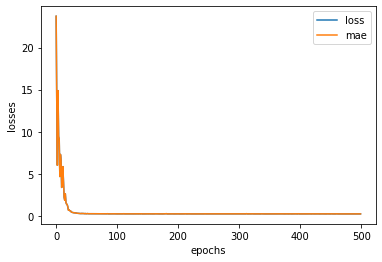

In [81]:
# plot history
pd.DataFrame(history.history).plot()
plt.ylabel("losses")
plt.xlabel("epochs")

In [82]:
# evluate it 
frame_model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 116ms/step - loss: 0.2221 - mae: 0.2221


[0.2220703661441803, 0.2220703661441803]

In [83]:
# normalization and standardzation

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["N.F.1", "N.F.2", "N.F.3", 'N.F.4', "N.F.5"]), # turn all values in these columns between 0 and 1
)

# create X and y values
df = pd.DataFrame(frame)
X = df.loc[0:99,['N.F.1', 'N.F.2','N.F.3','N.F.4','N.F.5']]
y = df.loc[0:99,['d/h',"l/L_A","l/L_B","l/L_C","l/L_D"]]

# build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the colum transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [84]:
# build a neural network to fit on our normalized data
tf.random.set_seed(42)

# 1. create the model
frame_model_4 = tf.keras.Sequential([
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

# 2. compile the model
frame_model_4.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

# 3. fit the model
frame_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 6ms/step - loss: 0.3628 - mae: 0.3628
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.3510 - mae: 0.3510
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.3446 - mae: 0.3446
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3403 - mae: 0.3403
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3382 - mae: 0.3382
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3352 - mae: 0.3352
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3322 - mae: 0.3322
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3293 - mae: 0.3293
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3270 - mae: 0.3270
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3243 - mae: 0.3243
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3218 

In [85]:
# evaluate our model trained on normalized data
frame_model_4.evaluate(X_test_normal, y_test)

1/1 [==============================] - 0s 114ms/step - loss: 0.2694 - mae: 0.2694


[0.2693900763988495, 0.2693900763988495]